In [9]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm 


In [27]:
_data=pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [32]:
data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [34]:
data.count()

Gender    10000
Height    10000
Weight    10000
dtype: int64

In [35]:
data['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [10]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [33]:
print(data.shape)
data.describe()

(10000, 3)


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [36]:
x=np.array(data['Height']).reshape(-1,1)
y=np.array(data['Weight']).reshape(-1,1)
LR=lm.LinearRegression().fit(x,y)
cd = LR.score(x, y)
print('coefficient of determination:', cd)
print('intercept:', LR.intercept_)
print('slope:', LR.coef_) 
ycap = LR.predict(x)
print('Predicted response:', ycap, sep='\n')

coefficient of determination: 0.8551742120609958
intercept: [-350.73719181]
slope: [[7.71728764]]
Predicted response:
[[219.16147993]
 [180.07254619]
 [221.19180859]
 ...
 [142.15047514]
 [182.01991949]
 [127.30437133]]


In [37]:
a = pd.DataFrame(data['Weight'])
b = pd.DataFrame(data['Height'])

In [38]:
import statsmodels.api as sms
M = sms.OLS(b,a).fit()
M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.726e+05
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                        22:38:59   Log-Likelihood:                         -36774.
No. Observations:               10000   AIC:                                  7.355e+04
Df Residuals:                    9999   BIC:                                  7.356e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.3997      0.001    687.489      0.000       0.399       0.401
==============================================================================
Omnibus:                      980.306   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.234
Skew:                          -0.020   Prob(JB):                     2.57e-63
Kurtosis:                       2.169   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

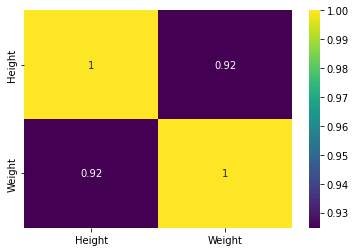

In [39]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


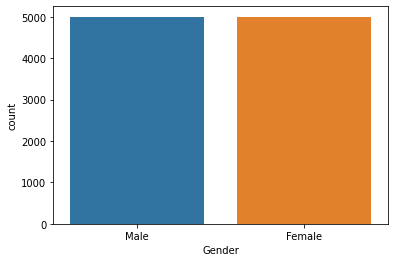

In [40]:
sns.countplot(data.Gender)

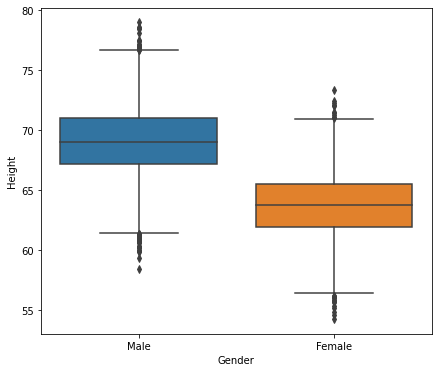

In [43]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Gender', y='Height', data=data)